In [1]:
import pandas as pd

data = pd.read_csv('./Data/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
data.shape

(569, 33)

In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data['diagnosis'].value_counts()
data.drop(['id'], axis=1, inplace=True)

data['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)

In [5]:
for columnName in data.columns:
    data[columnName].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: radius_mean
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: texture_mean
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: perimeter_mean
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: area_mean
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float

In [6]:
for columnName in data.columns:
    print(data[columnName].value_counts())
    print('-' * 40)

0    357
1    212
Name: diagnosis, dtype: int64
----------------------------------------
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64
----------------------------------------
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64
----------------------------------------
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64
----------------------------------------
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: area_mean, Length: 539, dtype: int64
----------------------------------------
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630

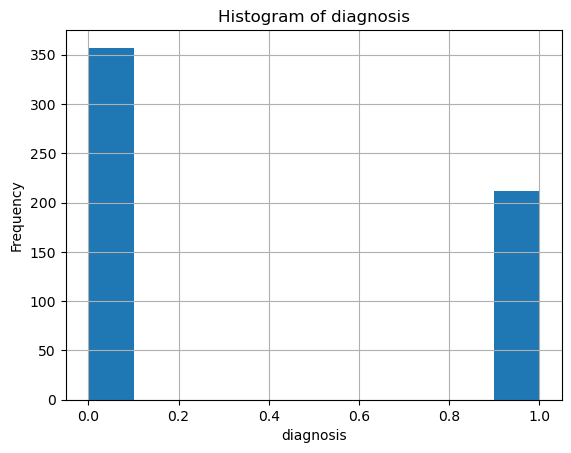

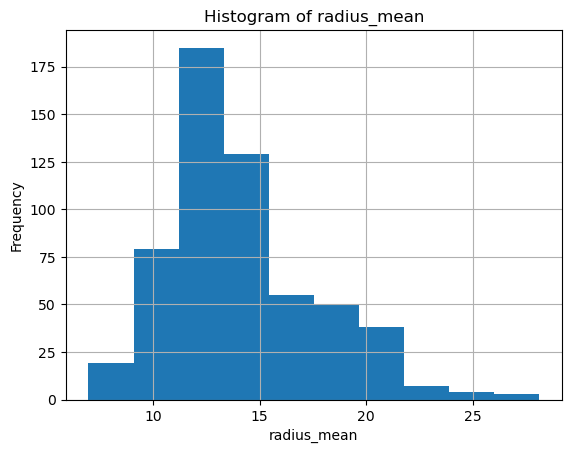

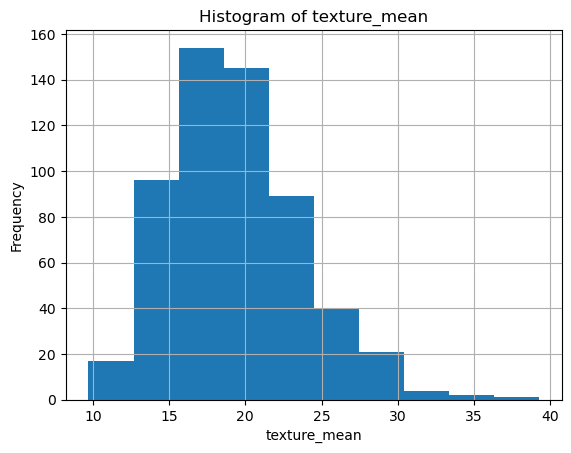

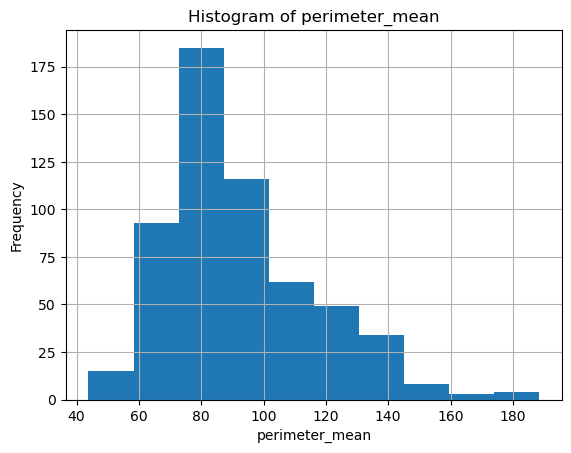

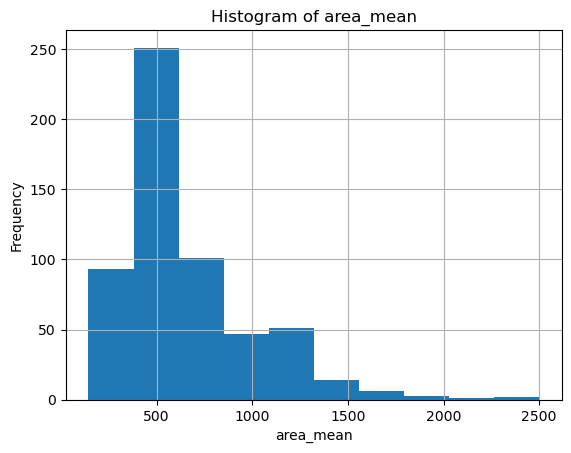

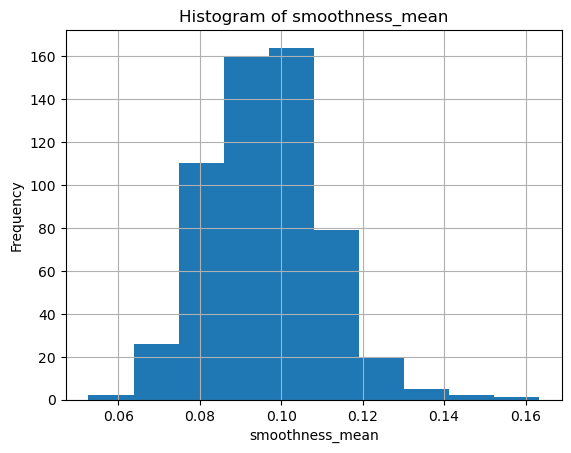

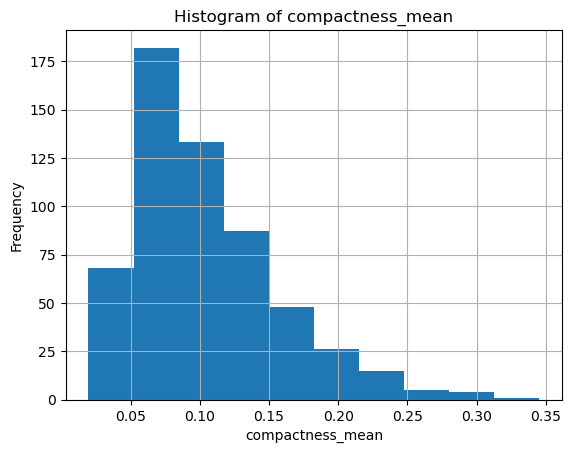

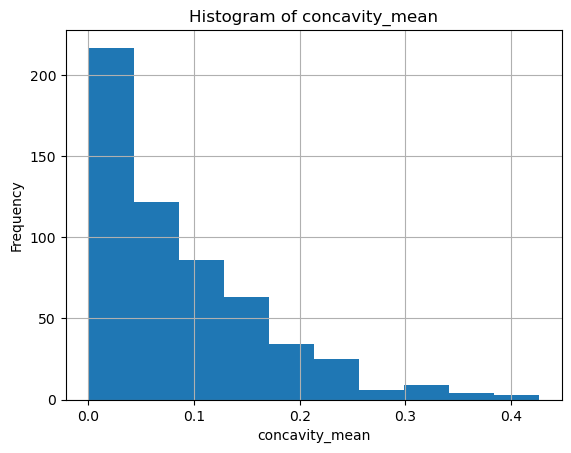

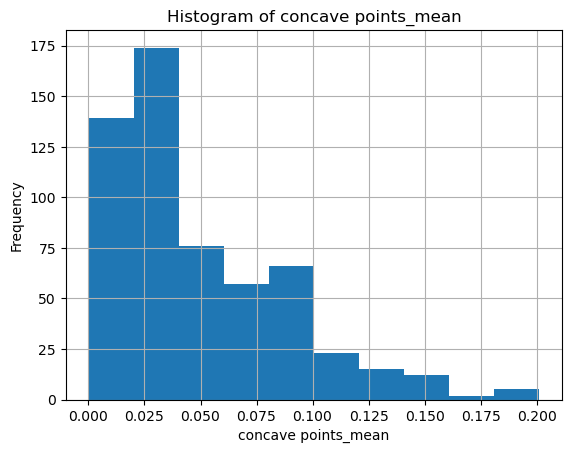

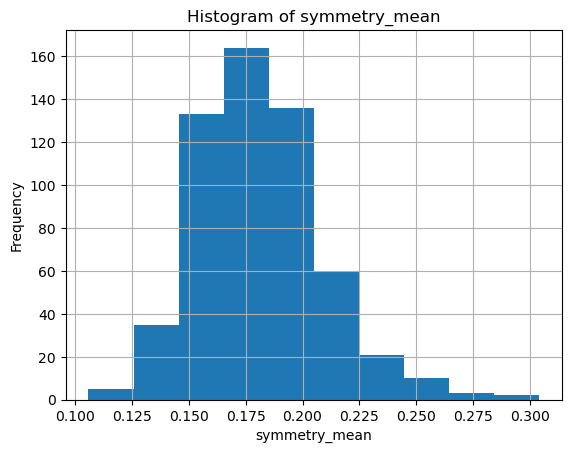

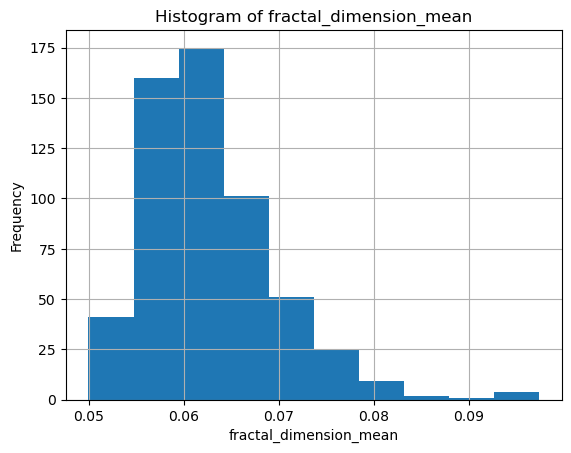

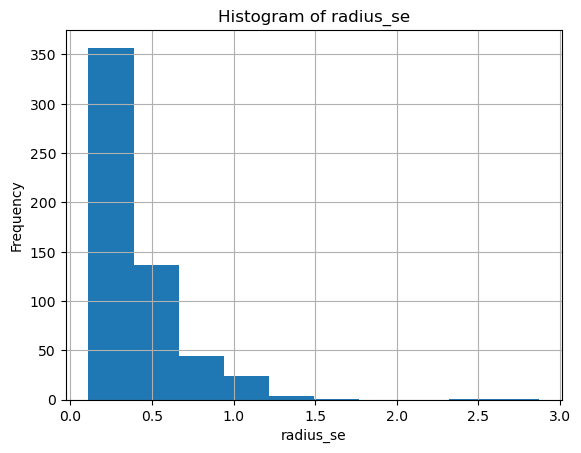

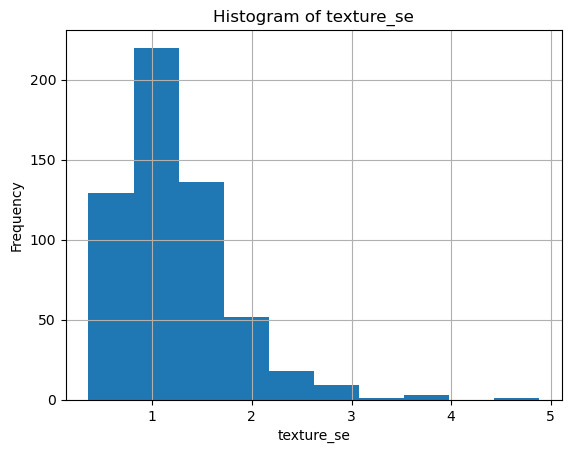

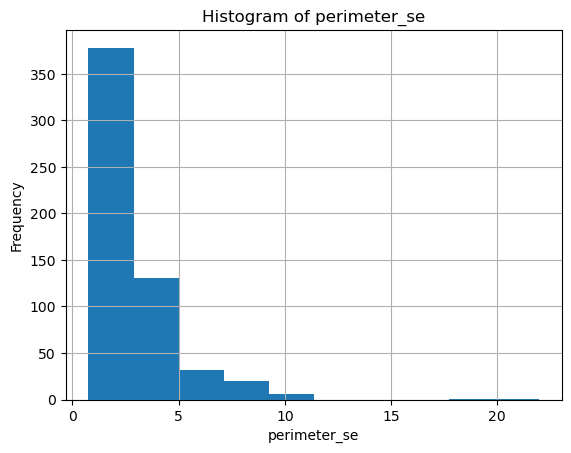

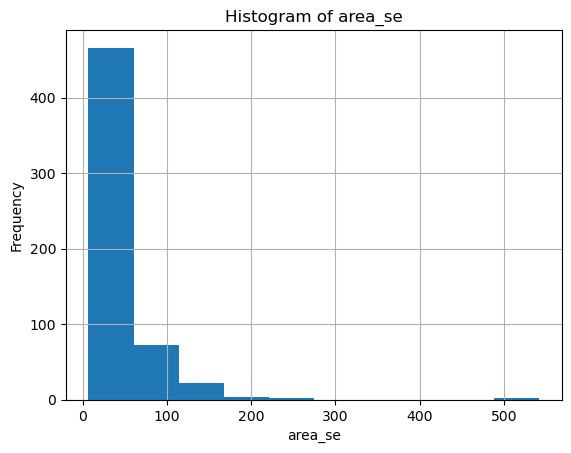

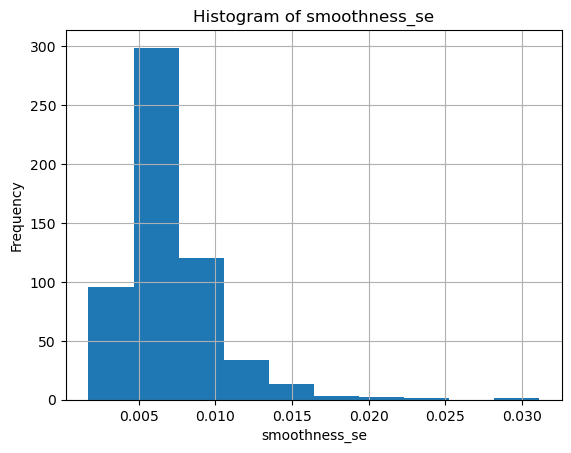

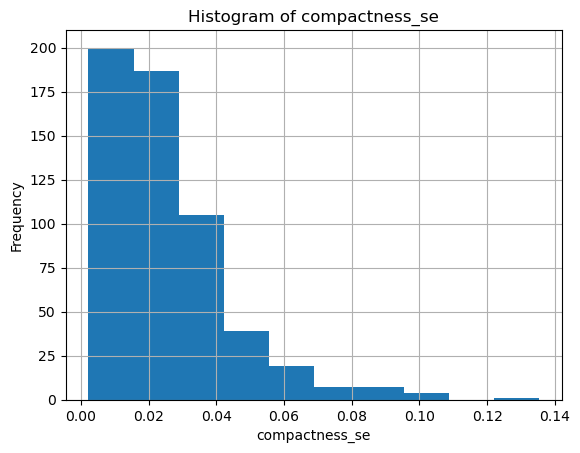

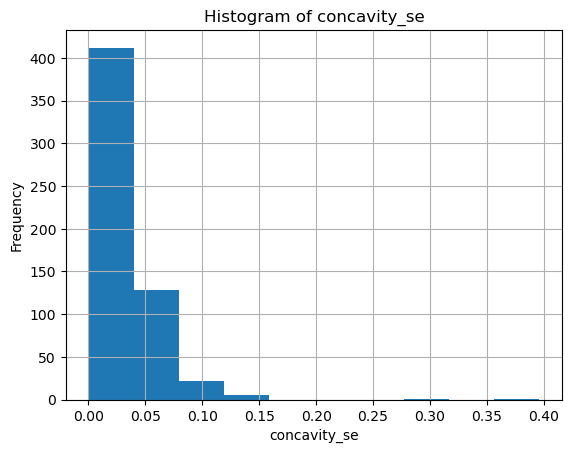

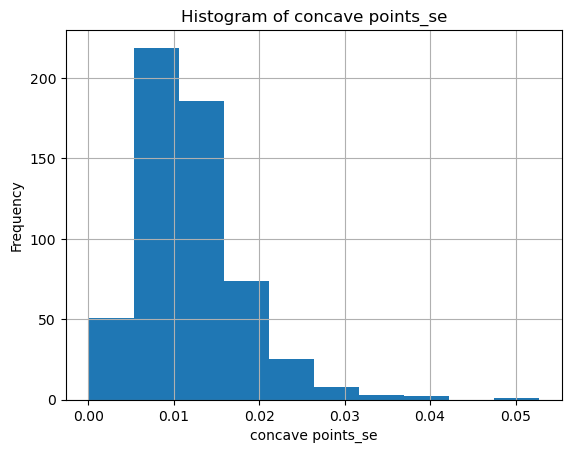

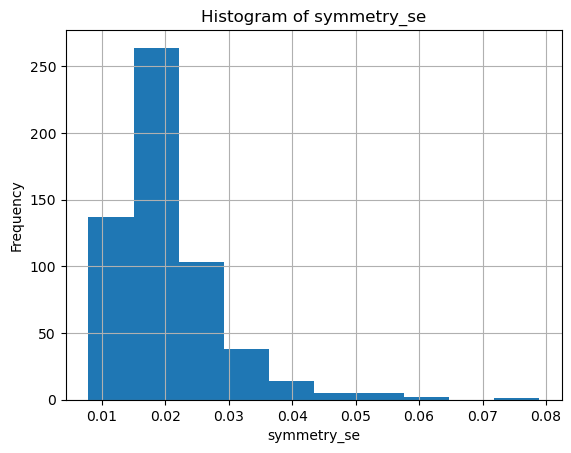

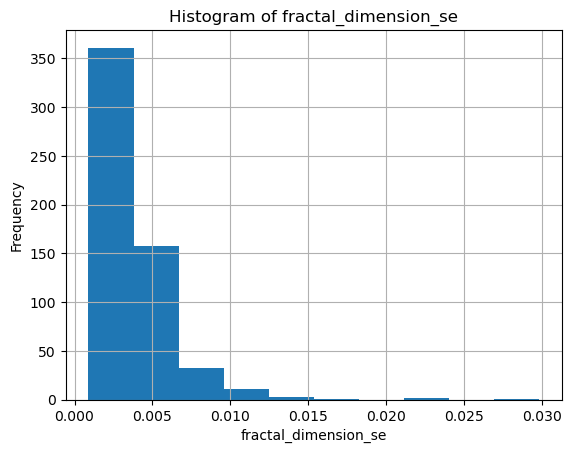

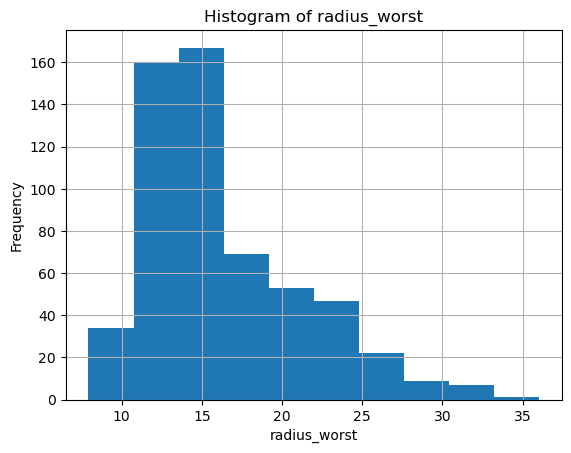

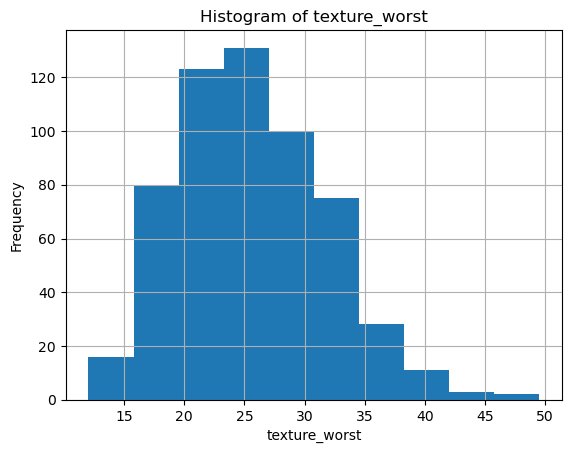

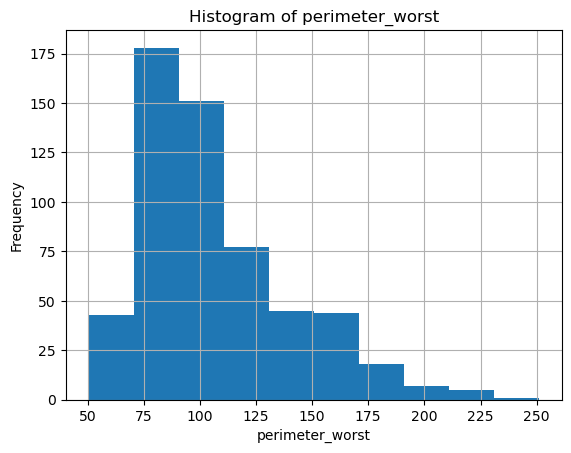

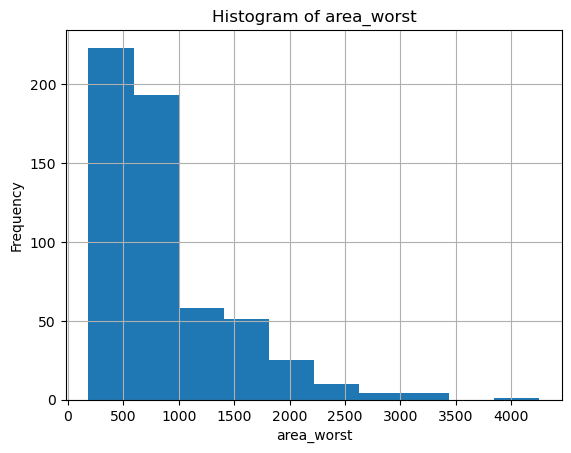

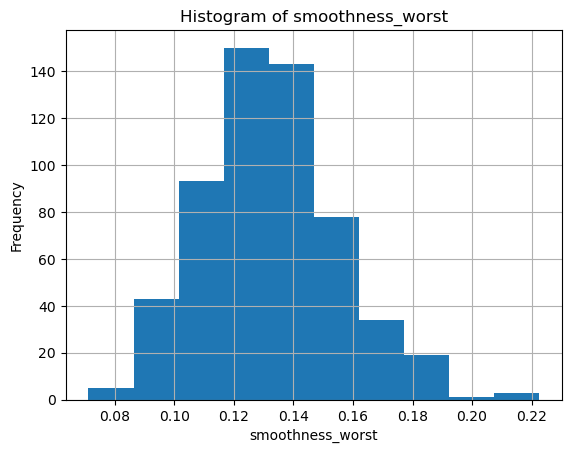

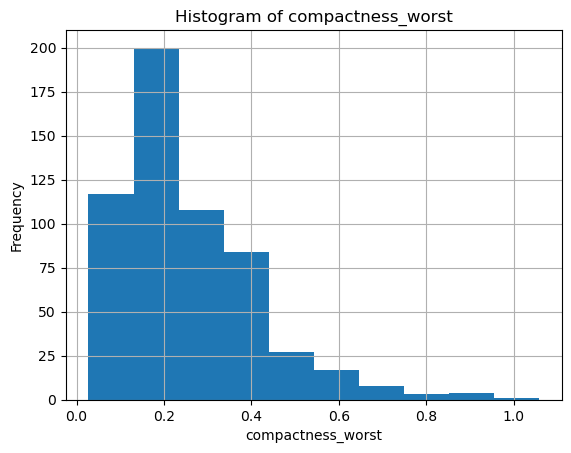

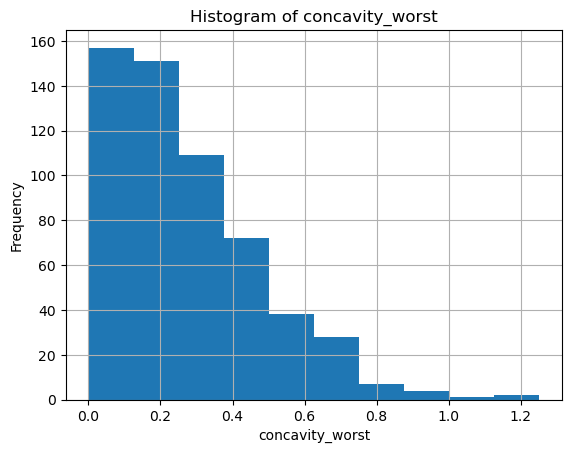

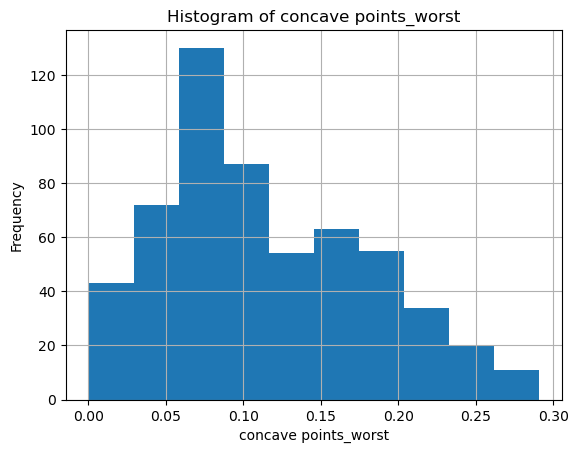

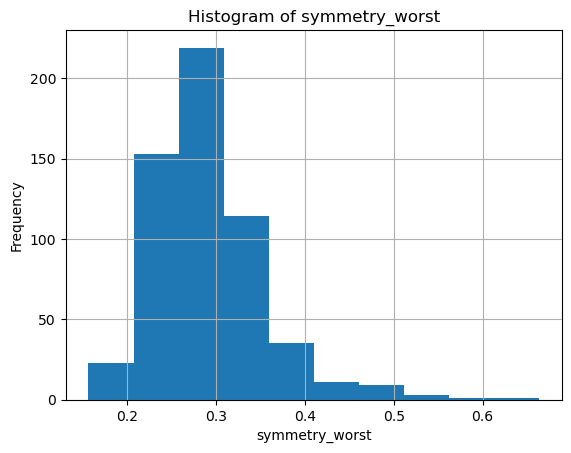

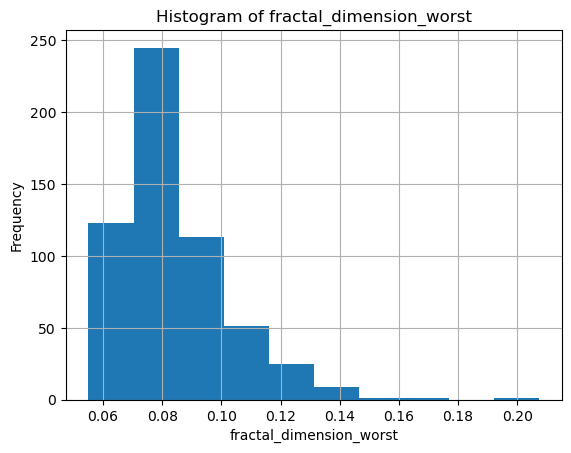

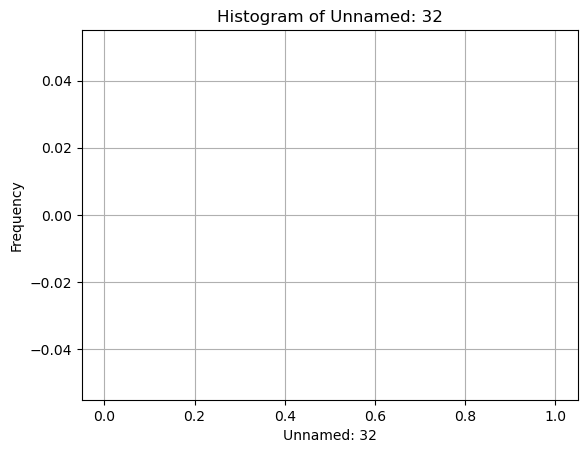

In [7]:
import matplotlib.pyplot as plt

def draw_hist():
    for columnName in data.columns:
        plt.figure()
        data[columnName].hist()
        plt.xlabel(columnName)
        plt.ylabel('Frequency')
        plt.title('Histogram of {}'.format(columnName))
        plt.show()
draw_hist()

In [8]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)

In [9]:
# threre are no missing values
# we don't need any data cleaning
# we will find important features using correlation matrix
# then we will just normalize data and create our model

In [10]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Figure size 640x480 with 0 Axes>

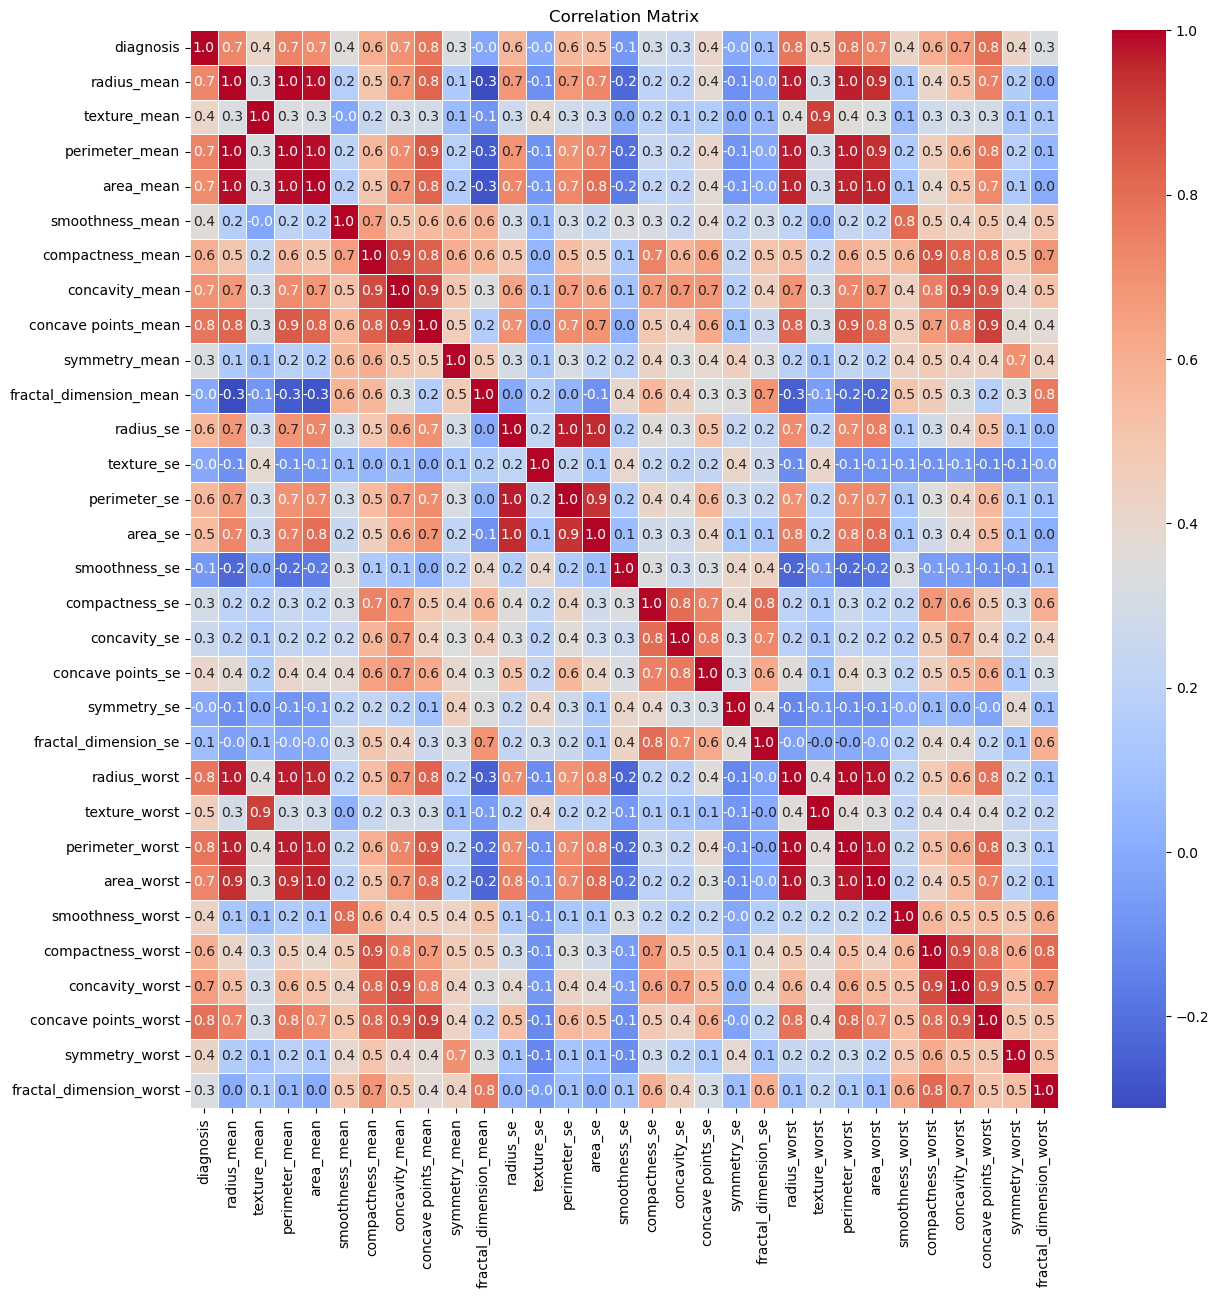

In [11]:
import seaborn as sns

plt.figure()
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Correlation Matrix")
plt.show()

,index,Corr
0,texture_mean,1
1,area_mean,1
2,smoothness_mean,1
3,concavity_mean,1
4,symmetry_mean,1
5,fractal_dimension_mean,1
6,texture_se,1
7,area_se,1
8,smoothness_se,1
9,concavity_se,1


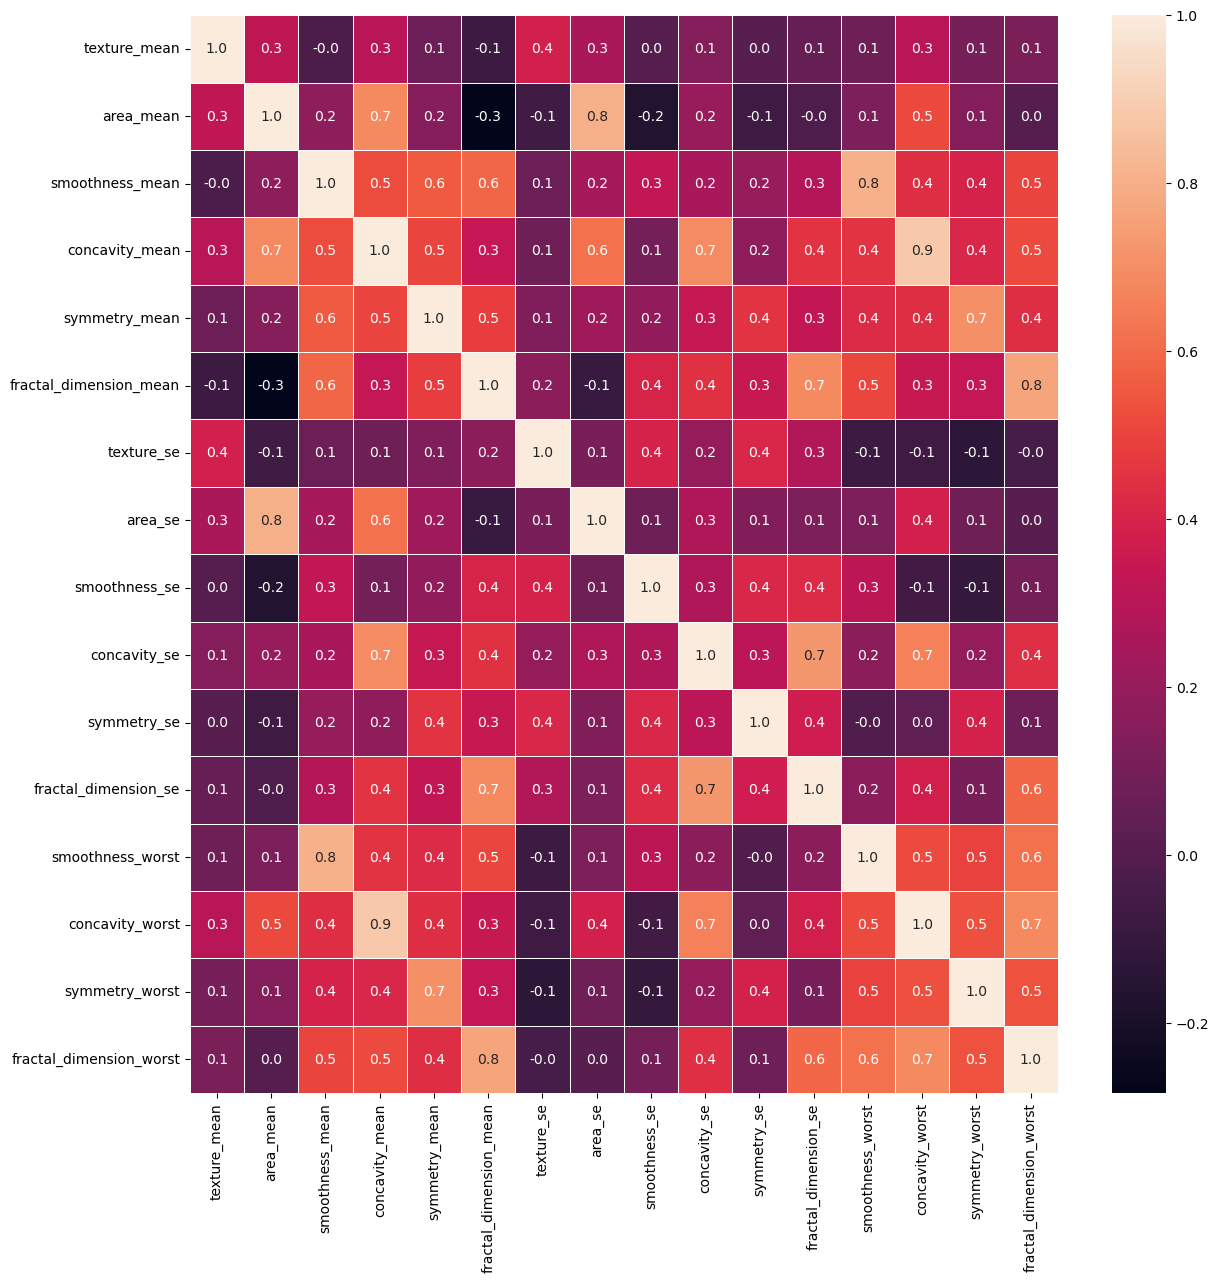

In [12]:
import numpy as np

def by_correlation(x,drop_list_cor):
    """
    selects the features by correlation
    
    args:
        x (pd.DataFrame):a dataframe of the independent variables
        drop_list_cor (list): a list of the columns believed to have high correlation
        
    returns:
        a dataframe demonstrating correlation among
    """
    x_1 = x.drop(drop_list_cor,axis = 1 )        # do not modify x, we will use it later 
    x_1.head()
    selected_feature_corr=x_1.columns
    fs_corr = np.ones(len(x_1.columns)).astype(int)
    fs_corr = pd.DataFrame(fs_corr, columns = ["Corr"], index=x_1.columns)
    f,ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
    return x_1,fs_corr

x = data.drop(['diagnosis'], axis=1)
drop_list_cor = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1,fs_corr = by_correlation(x,drop_list_cor)
fs_corr = fs_corr.reset_index();fs_corr

In [13]:
y = data['diagnosis']

Accuracy is:  0.9649122807017544


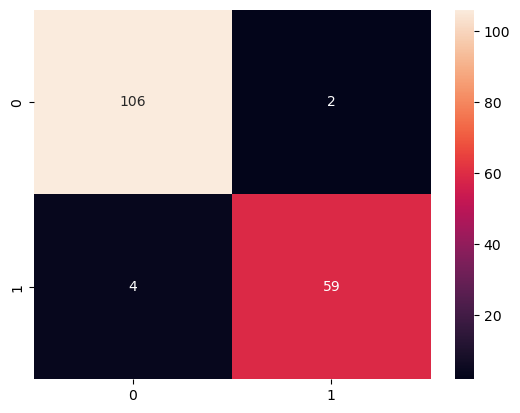

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

def test_rf(x,y):
    """
    find correlation tests by random forest
    
    args:
        x (pd.DataFrame): a dataframe of the independent variables
        y (pd.DataFrame): a dataframe of the dependent variable
    
    returns:
        a heatmap showing rf results
        
    """
    # split data train 70 % and test 30 %
    x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

    #random forest classifier with n_estimators=10 (default)
    clf_rf = RandomForestClassifier(random_state=43)      
    clr_rf = clf_rf.fit(x_train,y_train)

    ac = accuracy_score(y_test,clf_rf.predict(x_test))
    print('Accuracy is: ',ac)
    cm = confusion_matrix(y_test,clf_rf.predict(x_test))
    sns.heatmap(cm,annot=True,fmt="d")
    return x_train, x_test, y_train, y_test,clr_rf

x_train, x_test, y_train, y_test,clr_rf = test_rf(x_1,y)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

2023-06-23 10:52:06.396615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


((455, 16), (455,))

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

def train_mlp(X_train, y_train, learning_rate, epochs):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)
    return model

In [17]:
models = []
models.append(train_mlp(x_train, y_train, 0.001, 25))
models.append(train_mlp(x_train, y_train, 0.005, 50))

2023-06-23 10:52:08.694810: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/25
15/15 [==============================] - 1s 5ms/step - loss: 2.8112 - accuracy: 0.5341
Epoch 2/25
15/15 [==============================] - 0s 6ms/step - loss: 1.4425 - accuracy: 0.5495
Epoch 3/25
15/15 [==============================] - 0s 6ms/step - loss: 0.7460 - accuracy: 0.6835
Epoch 4/25
15/15 [==============================] - 0s 6ms/step - loss: 0.6659 - accuracy: 0.6462
Epoch 5/25
15/15 [==============================] - 0s 6ms/step - loss: 0.5002 - accuracy: 0.7758
Epoch 6/25
15/15 [==============================] - 0s 6ms/step - loss: 0.4957 - accuracy: 0.7802
Epoch 7/25
15/15 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.7648
Epoch 8/25
15/15 [==============================] - 0s 4ms/step - loss: 0.4936 - accuracy: 0.7758
Epoch 9/25
15/15 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8264
Epoch 10/25
15/15 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.6989
Epoch 11/25
15/15 [

In [18]:
def print_result(model):
    print("=" * 50)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("F1-Score:", f1)
    print("Accuracy:", accuracy)
    print("Precision:", precision)

for model in models:
    print_result(model)

Test loss: 0.2921
Test accuracy: 0.8772
4/4 [==============================] - 0s 11ms/step
Confusion Matrix:
[[71  0]
 [41  2]]
F1-Score: 0.08888888888888888
Accuracy: 0.6403508771929824
Precision: 1.0
Test loss: 0.7012
Test accuracy: 0.7456
4/4 [==============================] - 0s 2ms/step
Confusion Matrix:
[[71  0]
 [42  1]]
F1-Score: 0.04545454545454545
Accuracy: 0.631578947368421
Precision: 1.0
